## 9.6. GMM_Odev

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import metrics

In [3]:
cleveland = pd.read_excel('cleveland.xlsx')

In [4]:
cleveland['num'] = cleveland.num.replace({'positive':1, 'negative':0})

In [5]:
cleveland = cleveland.dropna()

In [6]:
X = cleveland.drop('num', axis=1)
Y = cleveland.num

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

1. n_components = 2 olarak ayarlayarak kalp hastalığı verilerine GMM uygulayın. Çözümünüz için ARI ve siluet skorlarına bakın ve önceki derslerde k-means ve hiyerarşik kümeleme çözümleriyle karşılaştırın. Hangi algoritma daha iyi performans gösteriyor?

In [7]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

In [8]:
clusters = gmm_cluster.fit_predict(X_std)

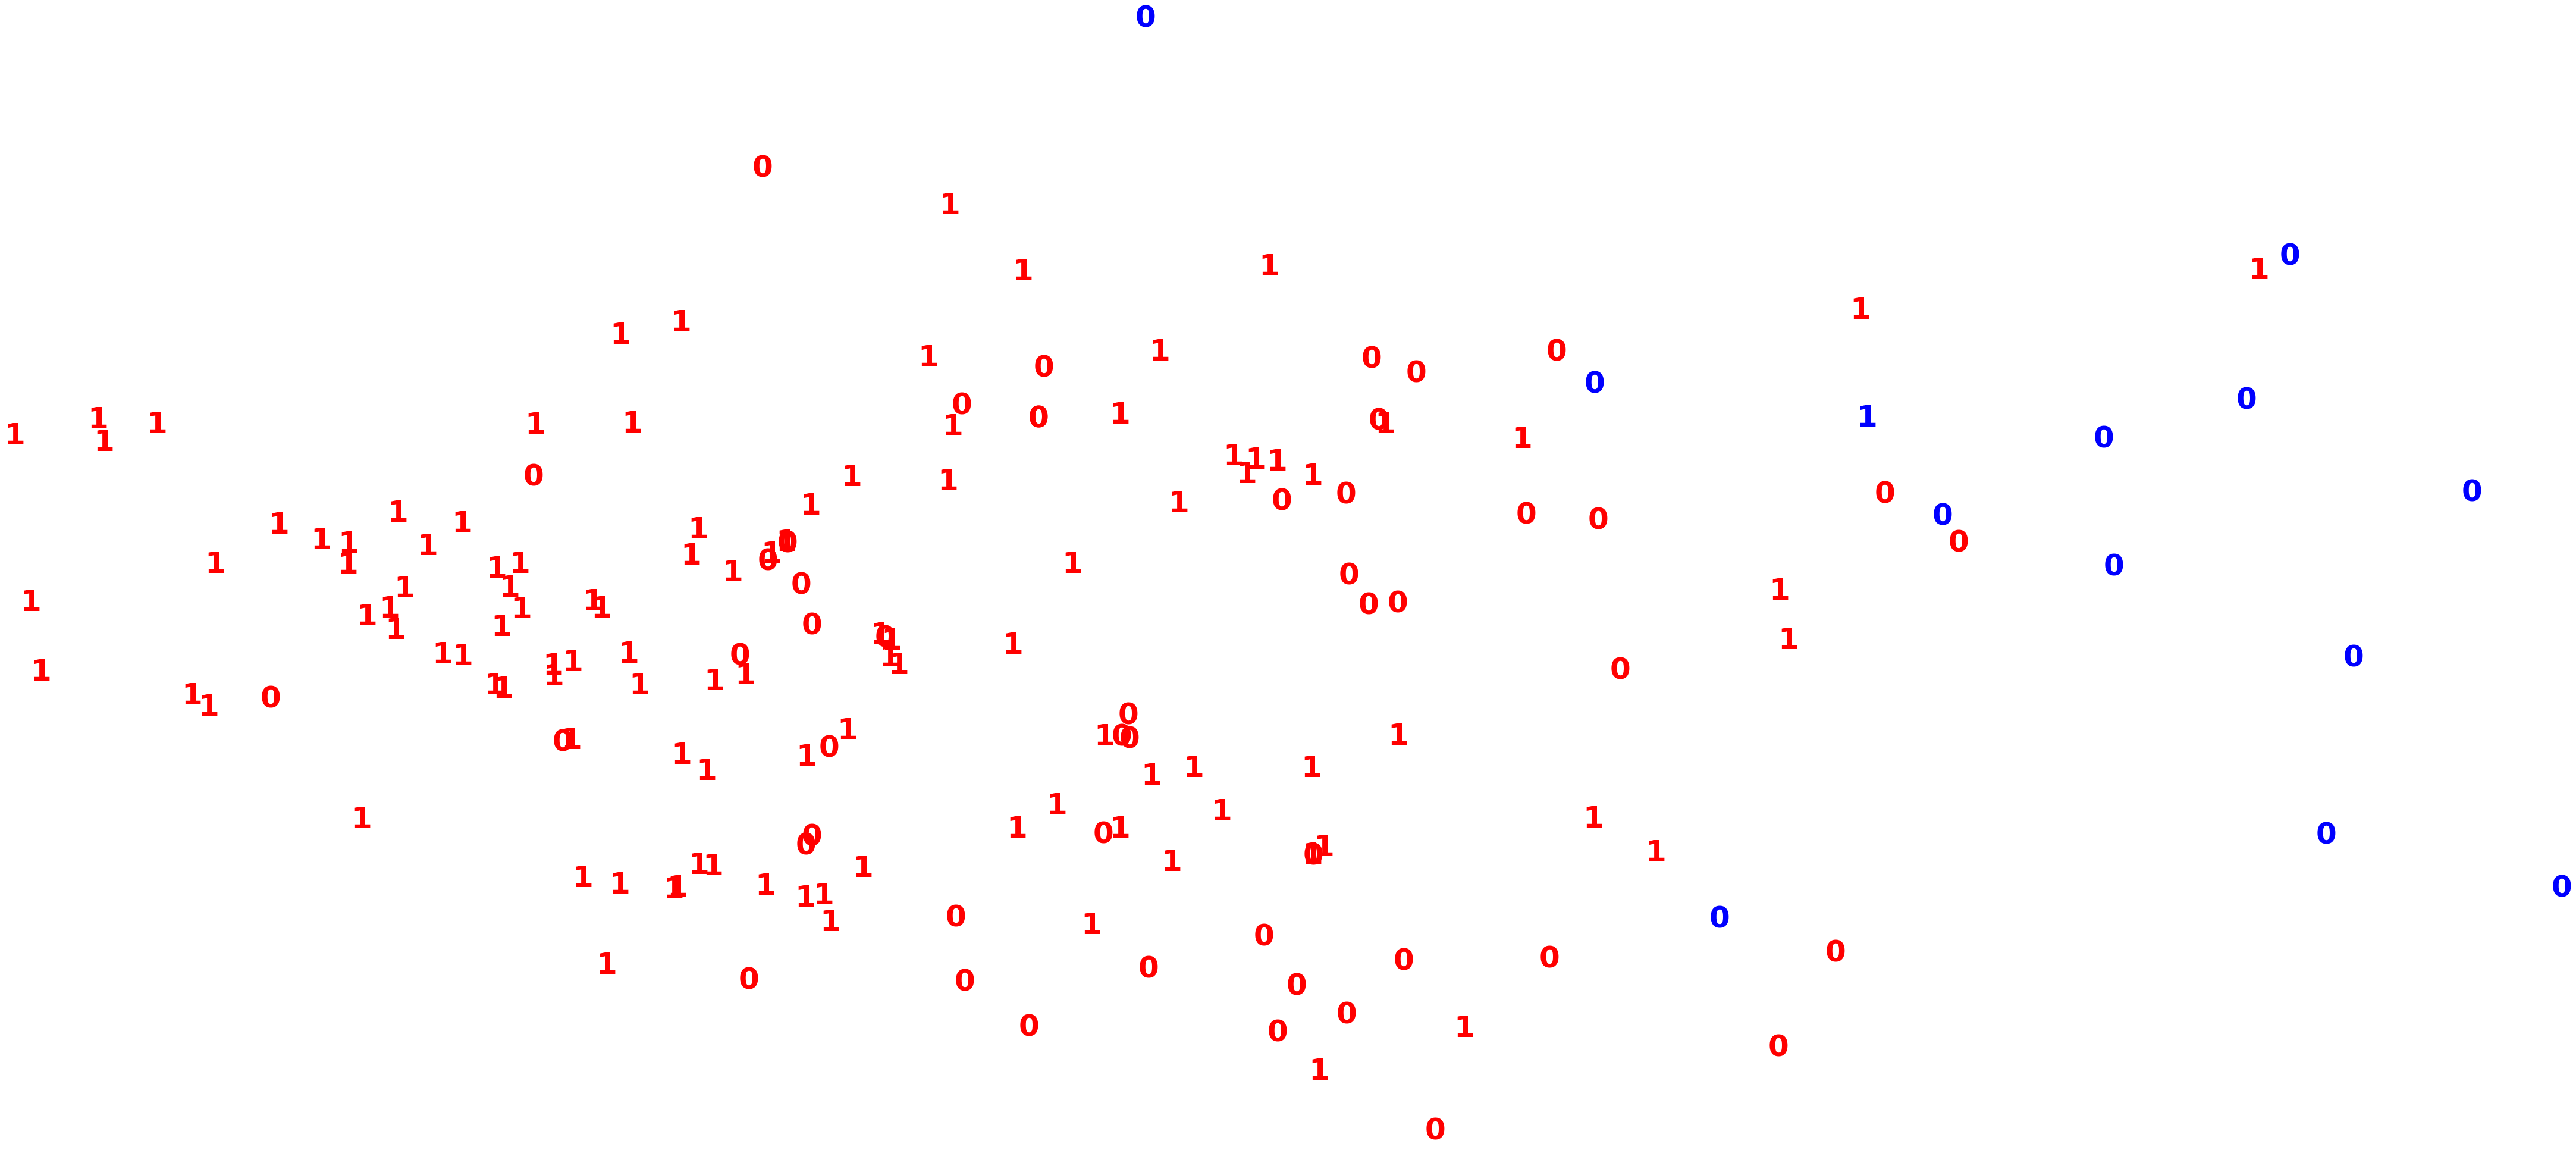

In [10]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[Y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [11]:
print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(Y, clusters)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.116
GMM çözümünün siluet skoru                  : 0.117


k-means uyguladigimizda ARI: 0.05033719948078657, siluet: 0.14335105335069603

hiyerarsik (complete) uyguladigimizda ARI: 0.08593607891738035, siluet: 0.11685651178322344

Genel olarak dusuk olsa da simdilik en iyi ARI sonucunu GMM ile aldik.

2. Scikit-learn ile GMM uygulanırken kullanılan parametrelerden biri de covariance_type'dir. Bu parametre, kullanılacak kovaryans parametrelerinin türünü belirler. Özellikle, belirtebileceğiniz dört tür vardır:

* full: Bu varsayılandır. Her bileşenin kendi genel kovaryans matrisi vardır.
* tied: Tüm bileşenler aynı genel kovaryans matrisini paylaşır.
* diag: Her bir bileşenin kendi çapraz kovaryans matrisi vardır.
* spherical: Her bir bileşenin kendine ait tek bir varyansı vardır.

Bunları deneyin. Hangisi ARI ve siluet skorları açısından daha iyi performans gösteriyor?

In [13]:
gmm_cluster_f = GaussianMixture(n_components=2, random_state=123, covariance_type='full')
clusters_f = gmm_cluster_f.fit_predict(X_std)

print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(Y, clusters_f)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters_f, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.116
GMM çözümünün siluet skoru                  : 0.117


In [14]:
gmm_cluster_t = GaussianMixture(n_components=2, random_state=123, covariance_type='tied')
clusters_t = gmm_cluster_t.fit_predict(X_std)

print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(Y, clusters_t)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters_t, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.128
GMM çözümünün siluet skoru                  : 0.145


In [15]:
gmm_cluster_d = GaussianMixture(n_components=2, random_state=123, covariance_type='diag')
clusters_d = gmm_cluster_d.fit_predict(X_std)

print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(Y, clusters_d)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters_d, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.054
GMM çözümünün siluet skoru                  : 0.103


In [16]:
gmm_cluster_s = GaussianMixture(n_components=2, random_state=123, covariance_type='spherical')
clusters_s = gmm_cluster_s.fit_predict(X_std)

print("GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): {:.3f}"
      .format(metrics.adjusted_rand_score(Y, clusters_s)))
print("GMM çözümünün siluet skoru                  : {:.3f}"
      .format(metrics.silhouette_score(X_std, clusters_s, metric='euclidean')))

GMM çözümünün Düzeltilmiş Rand Endeksi (ARI): -0.009
GMM çözümünün siluet skoru                  : 0.110


'tied' ile daha iyi bir sonuc elde ettik